In [17]:
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

crime_df = pd.read_csv("USArrests.csv")

crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Clustering

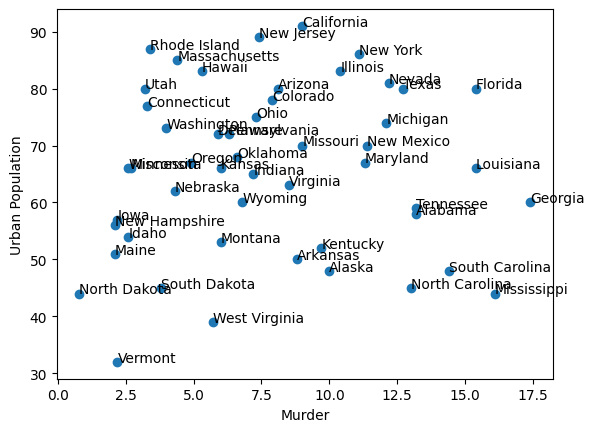

In [18]:
from sklearn.cluster import KMeans
X = crime_df.drop('State',axis =1)
y = crime_df["State"]

plt.scatter(X['Murder'],X['UrbanPop'])
#enumerating allows you to keep track of the 
#index associate with each iteration
for  i, txt in enumerate(y): 
    plt.annotate(txt, (X['Murder'][i],X['UrbanPop'][i]))

plt.xlabel('Murder')
plt.ylabel('Urban Population')
plt.show()

In [19]:
inertias = []
distortions = []

for k in range(1,10):
    # build and fit the model
    model = KMeans(n_clusters=k).fit(X)

    # Distortion is the average of the squared
    # distance from the cluster center
    # to the data points in Euclidean space
    # Euclidean space = standard 2+ dimensional space
    distance = cdist(X, model.cluster_centers_,
                                  'euclidean')
    distortion = sum(np.min(distance,axis =1))/X.shape[0]
    distortions.append(distortion)

    #inertia is calculated by measuring the distance between
    # each data point and the centroid and summing
    # the squared across the cluster. A good model
    # is one with low intertia or distortion
    # AND a low number of clusters
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with Distortion')

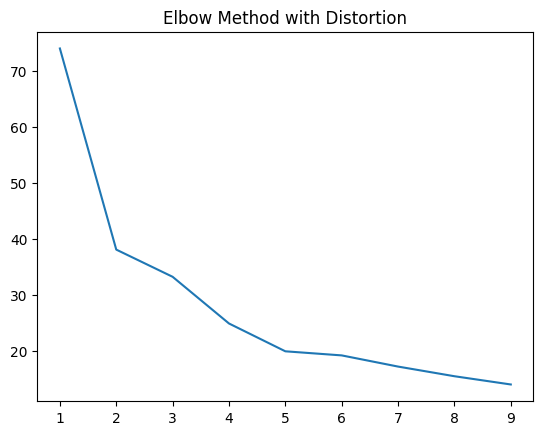

In [20]:
plt.plot(range(1,10),distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

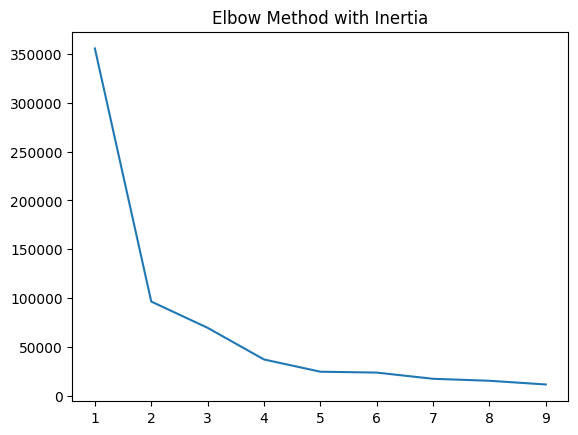

In [21]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

# Hierarchical

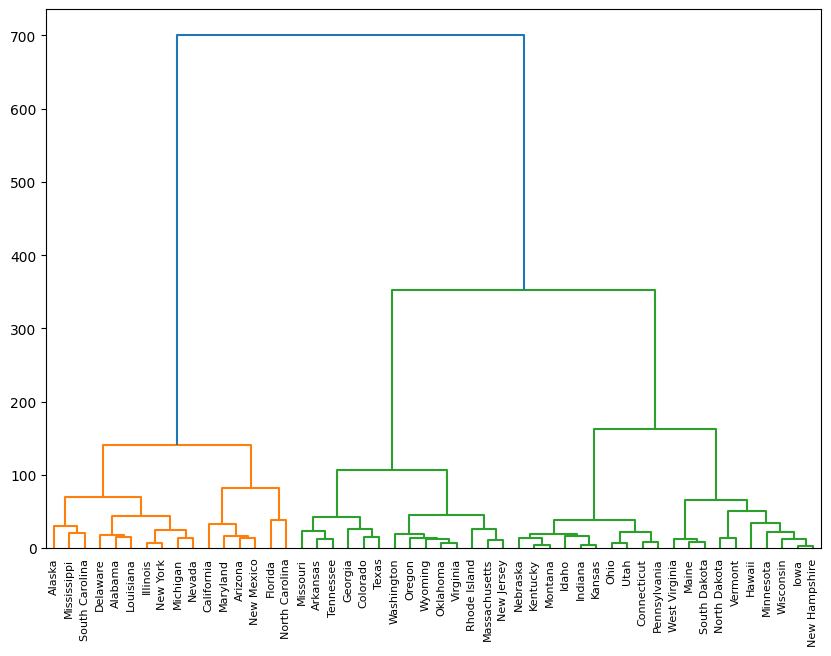

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X,'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked,labels= list(y))

In [23]:
from sklearn.cluster import AgglomerativeClustering
# divides the population into several clusters such that the data points
# in the same cluster are more similar to each ther and the data points in
# different clusters are more dissimilar
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

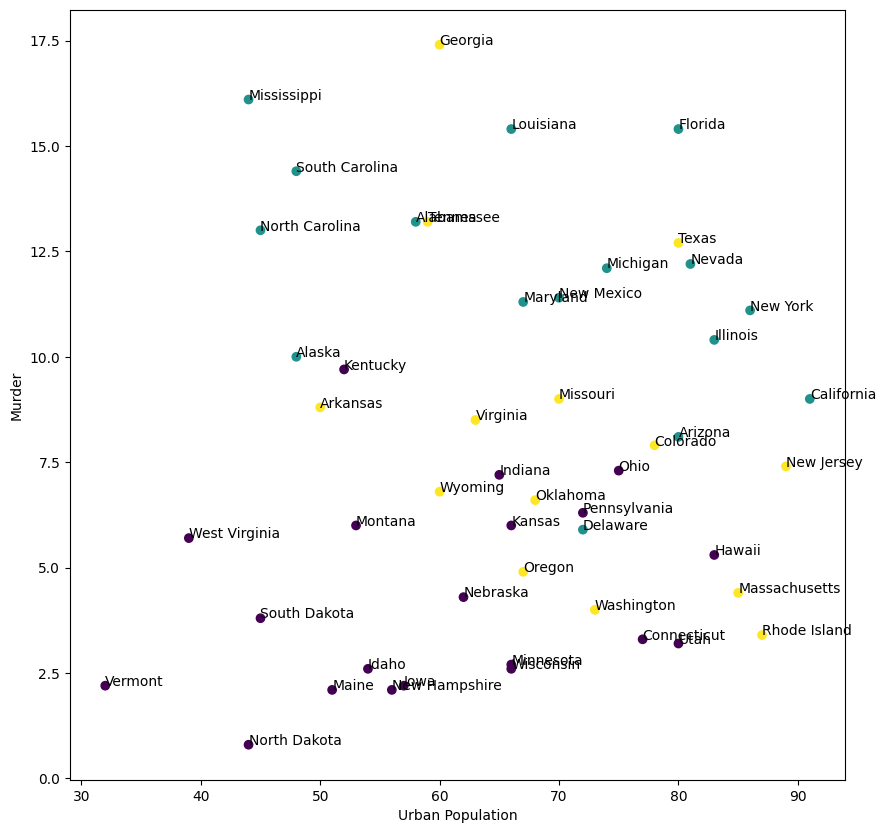

In [24]:
plt.figure(figsize = (10,10))
plt.scatter(X['UrbanPop'],X['Murder'], c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt, (X['UrbanPop'][i],X['Murder'][i]))

plt.ylabel('Murder')
plt.xlabel('Urban Population')
plt.show()

# Dimensionality Reduction

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#train test split - cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,
                                                    random_state=32,
                                                    stratify=y)

model = LogisticRegression(random_state=32).fit(X_train, y_train)

#predicted outcome
y_predicted = model.predict(X_test)

print(model.score(X_test,y_test))

0.7922077922077922


c:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


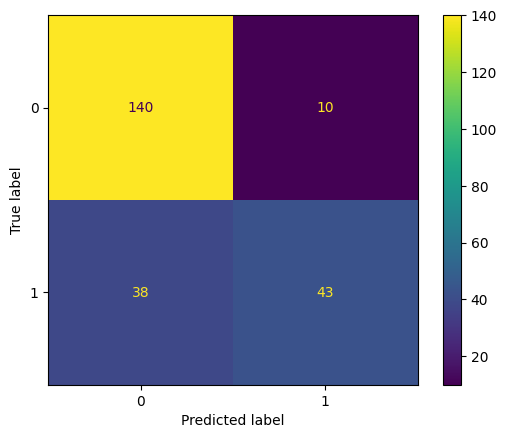

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

In [28]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6)
# singular value decomposition = factorization technique for real or comple numbers
# in a matrix
# in short, it is untangling patterns in the numbers using matrix decomposition (linear algebra concept)

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

model = LogisticRegression(random_state=32).fit(X_train_svd, y_train)

model.score(X_test_svd, y_test)

0.70995670995671

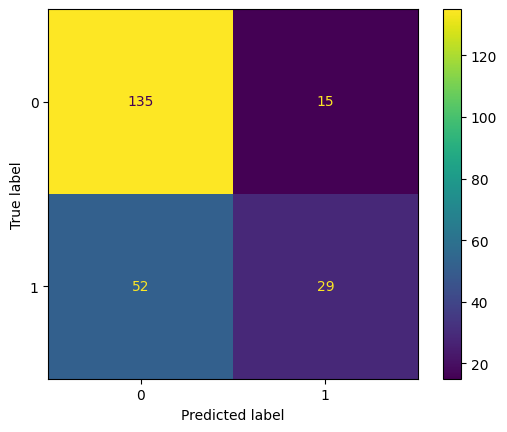

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_svd, y_test)